Dataset website: http://archive.ics.uci.edu/ml/datasets/Heart+Disease

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

import numpy as np


from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,RocCurveDisplay,auc
from sklearn.metrics import mean_squared_error,mean_absolute_error



In [54]:
header_list = ["age","workclass","fnlwgt","Education-level","education-num","marital-status","occupation","relationship",
               "race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]

data = pd.read_csv(r"C:\Users\HP\Desktop\Fiver\data_50k\adult.data.Csv",names = header_list)
# Show 10 first lines of data
data.head(10)

,age,workclass,fnlwgt,Education-level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Data is unbalanced


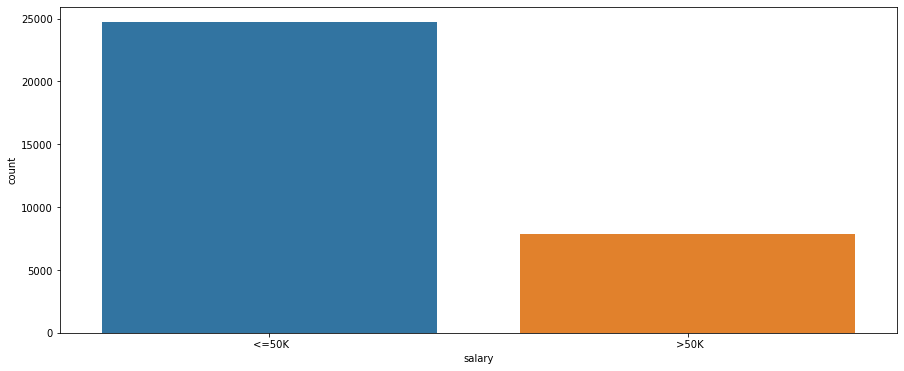

In [18]:
# First let's clean the data
plt.figure(figsize=(15,6))
sns.countplot(x = "salary", data = data)
print("Data is unbalanced")

Age is a key factor


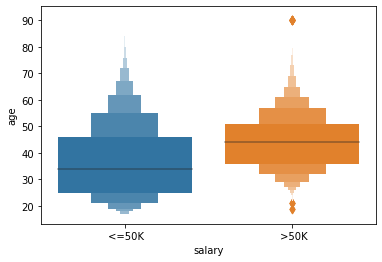

In [10]:
# Distribution of ages

#sns.kdeplot(data['age'],shade=True).set_title('Distribution of ages')
sns.boxenplot(x="salary", y="age", data=data)
print("Age is a key factor")

"it's reasonable since male working percentage is higher than females."

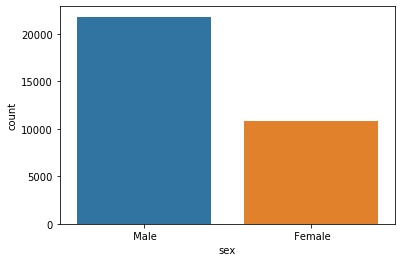

In [51]:
sns.countplot(x="sex", data = data)
"""it's reasonable since male working percentage is higher than females."""

'Education is also a key factor in the salary, most of the salaries higher\nthan 50K have a mean education num of 12 years.\n\nAt the other hand, we find that most of those who has less than 10 years education earn less than 50K'

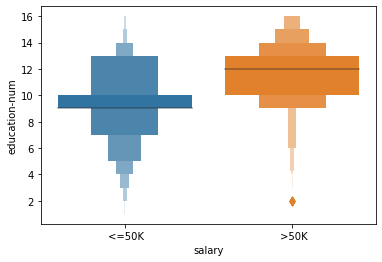

In [13]:
# Years spent in education

sns.boxenplot(x = "salary", y = "education-num", data = data)

"""Education is also a key factor in the salary, most of the salaries higher
than 50K have a mean education num of 12 years.

At the other hand, we find that most of those who has less than 10 years education earn less than 50K"""

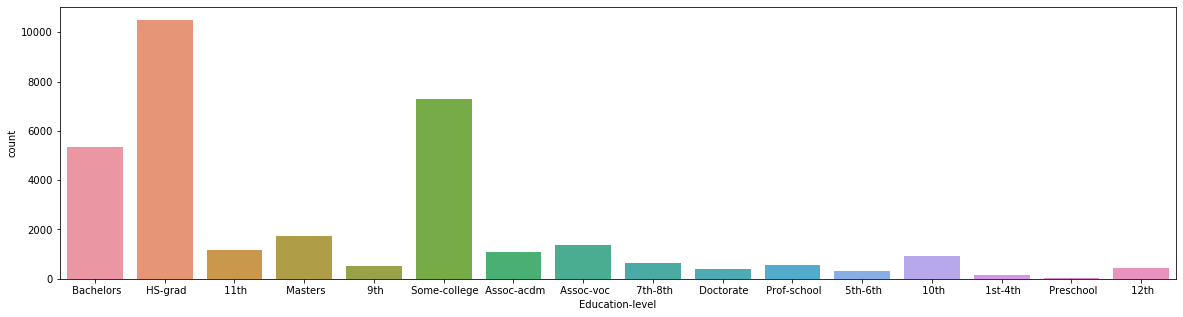

In [58]:
plt.figure(figsize = (20,5) ) 

sns.countplot(x='Education-level',data = data)

'The most part is for people who are married, the second part is for single'

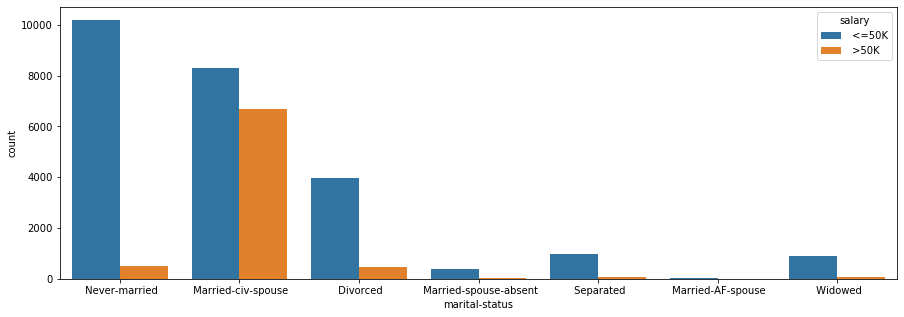

In [60]:
plt.figure(figsize = (15,5) ) 
sns.countplot(x = "marital-status",hue="salary", data = data)
"""The most part is for people who are married, the second part is for single"""

'male working percentage is higher, so husband label has the most amounts'

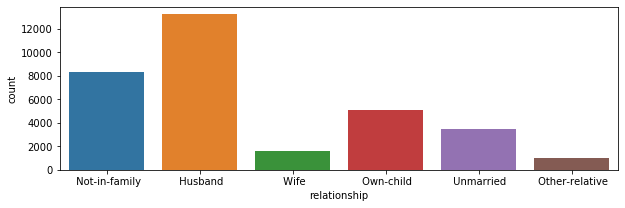

In [66]:
plt.figure(figsize = (10,3) ) 
sns.countplot(x = "relationship", data = data)
"""male working percentage is higher, so husband label has the most amounts"""

'In this data, white people are a large part, followed by black people'

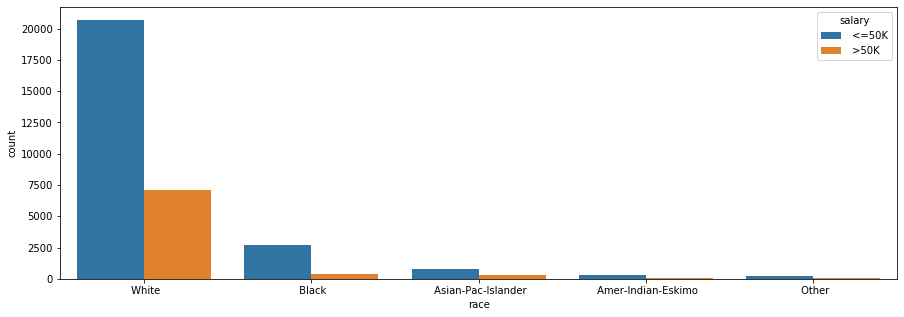

In [67]:
plt.figure(figsize = (15,5) ) 
sns.countplot(x = "race",hue="salary", data = data)
"""In this data, white people are a large part, followed by black people"""

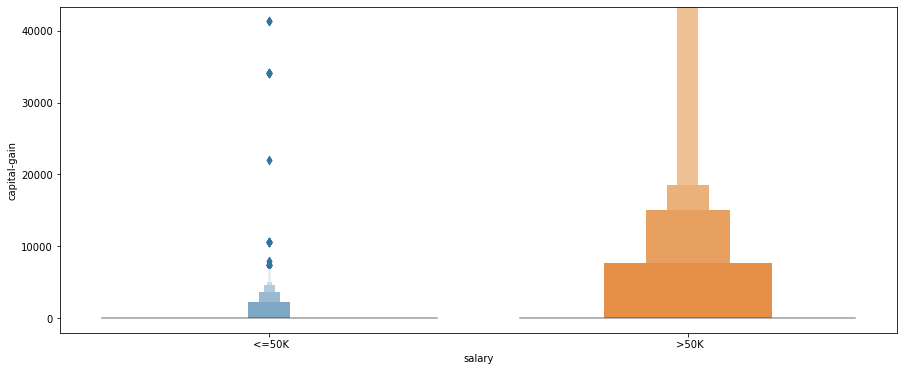

In [45]:
plt.figure(figsize = (15,6) ) 
sns.boxenplot(x = "salary",y = "capital-gain", data = data)

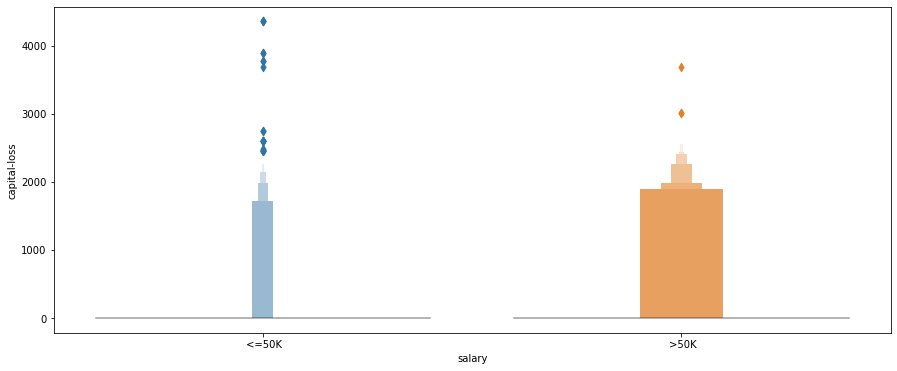

In [46]:
plt.figure(figsize = (15,6) ) 
sns.boxenplot(x = "salary",y = "capital-loss", data = data)

'Most of adults with salaries more than 50K work more than 40 hours per week'

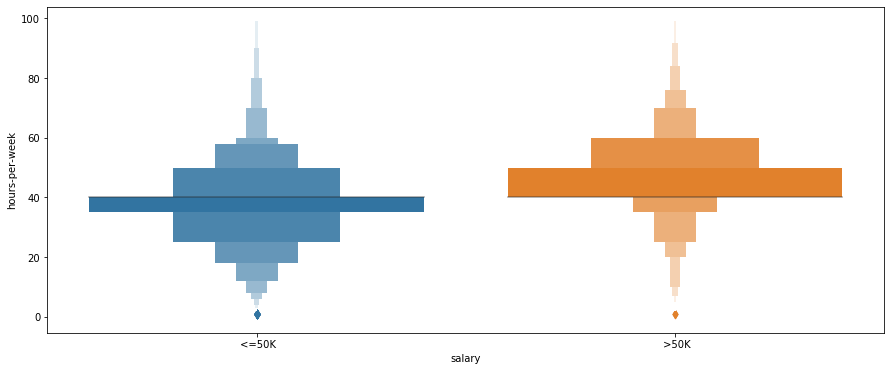

In [48]:
plt.figure(figsize = (15,6) ) 
sns.boxenplot(x = "salary",y = "hours-per-week", data = data)
"""Most of adults with salaries more than 50K work more than 40 hours per week"""

In [55]:
# Remove spaces
df_obj = data.select_dtypes(['object'])
data[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

# After data visualisation, we pass to onehot encoding for several features who are not numeric

# create numerical columns representing the categorical data
data['workclass_num'] = data.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
data['over50K'] = np.where(data.salary == '<=50K', 0, 1)
data['marital_num'] = data['marital-status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
data['race_num'] = data.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
data['sex_num'] = np.where(data.sex == 'Female', 0, 1)
data['rel_num'] = data.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
data.head(10)

,age,workclass,fnlwgt,Education-level,education-num,marital-status,occupation,relationship,race,sex,...,capital-loss,hours-per-week,native-country,salary,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,<=50K,1.0,0,3,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,3.0,0,4,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,0.0,0,1,0,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,0.0,0,4,1,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,0.0,0,4,1,0,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,0.0,0,4,0,0,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,0,16,Jamaica,<=50K,0.0,0,5,1,0,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,45,United-States,>50K,3.0,1,4,0,1,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,0,50,United-States,>50K,0.0,1,3,0,0,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,40,United-States,>50K,0.0,1,4,0,1,1


'fnlwgt is not correlated to the income since the correlation is 0. so we can drop it'

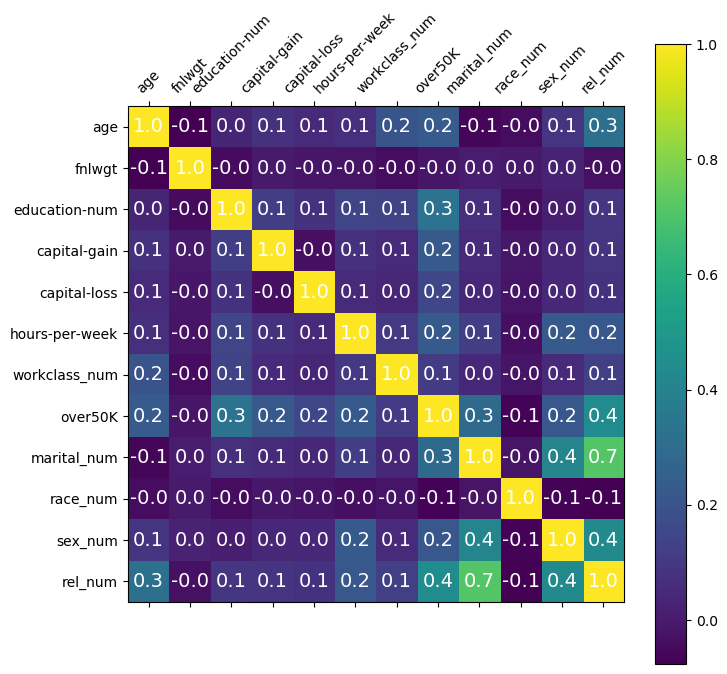

In [16]:
#Ploting the correlation between the output(income) and individual features
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

plt.matshow(data.corr())
plt.colorbar()
plt.xticks(np.arange(len(data.corr().columns)), data.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(data.corr().columns)), data.corr().columns.values) 
for (i, j), corr in np.ndenumerate(data.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)
    
"""fnlwgt is not correlated to the income since the correlation is 0. so we can drop it"""

In [64]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(data[['age','workclass_num', 'education-num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital-gain', 'capital-loss','over50K']])

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
X = df[['age','workclass_num', 'education-num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital-gain', 'capital-loss']]
y = df.over50K

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [90]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

'We see that the main features are the age, education,relationship status and Capital gain.'

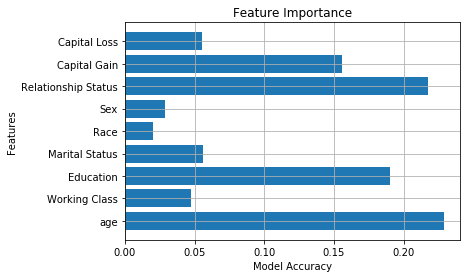

In [80]:
#4
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(9) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('age','Working Class', 'Education', 'Marital Status', 'Race', 'Sex', 'Relationship Status', 'Capital Gain', 'Capital Loss'))
plt.grid(True)
"""We see that the main features are the age, education,relationship status and Capital gain."""

In [85]:
#5 RFE

# create a base classifier used to evaluate a subset of attributes
logreg = LogisticRegression()

# create the RFE model and select 3 attributes
rfe = RFE(logreg, 9)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

"""All the features seem to be useful for the classification"""

[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


'All the features seem to be useful for the classification'

In [95]:
#6
#PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [110]:
#7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Original data
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN")
print("model accuracy is:", accuracy_score(y_test,knn.predict(X_test)))
print("model recall is:", recall_score(y_test,knn.predict(X_test)))
print("model precision is:", precision_score(y_test,knn.predict(X_test)))

print('NAIVE BAYES')
nv = GaussianNB()
nv.fit(X_train,y_train)
print("model accuracy is:", accuracy_score(y_test,nv.predict(X_test)))
print("model recall is:", recall_score(y_test,nv.predict(X_test)))
print("model precision is:", precision_score(y_test,nv.predict(X_test)))

print("Random Forest")
rdm = RandomForestClassifier()
rdm.fit(X_train,y_train)
print("model accuracy is:", accuracy_score(y_test,rdm.predict(X_test)))
print("model recall is:", recall_score(y_test,rdm.predict(X_test)))
print("model precision is:", precision_score(y_test,rdm.predict(X_test)))


#Classification

print("logistic regression")
log = LogisticRegression()
log.fit(X_train,y_train)
print("model RMSE is:", mean_squared_error(y_test,rdm.predict(X_test)))
print("model MAE is:", mean_absolute_error(y_test,rdm.predict(X_test)))


print("linear regression")
lin = LinearRegression()
lin.fit(X_train,y_train)
print("model RMSE is:", mean_squared_error(y_test,rdm.predict(X_test)))
print("model MAE is:", mean_absolute_error(y_test,rdm.predict(X_test)))


KNN
model accuracy is: 0.829732662523429
model recall is: 0.5801646413171305
model precision is: 0.6932084309133489
NAIVE BAYES
model accuracy is: 0.8004340534674953
model recall is: 0.364562916503332
model precision is: 0.6981981981981982
Random Forest
model accuracy is: 0.8394988655420736
model recall is: 0.5923167385339083
model precision is: 0.7202097235462345
logistic regression
model RMSE is: 0.1605011344579264
model MAE is: 0.1605011344579264
linear regression
model RMSE is: 0.1605011344579264
model MAE is: 0.1605011344579264


In [114]:
#pca data
X_pca_train = pca.transform(X_train)
X_pca_test = pca.transform(X_test)

In [115]:
knn = KNeighborsClassifier()
knn.fit(X_pca_train,y_train)
print("KNN")
print("model accuracy is:", accuracy_score(y_test,knn.predict(X_pca_test)))
print("model recall is:", recall_score(y_test,knn.predict(X_pca_test)))
print("model precision is:", precision_score(y_test,knn.predict(X_pca_test)))

print('NAIVE BAYES')
nv = GaussianNB()
nv.fit(X_pca_train,y_train)
print("model accuracy is:", accuracy_score(y_test,nv.predict(X_pca_test)))
print("model recall is:", recall_score(y_test,nv.predict(X_pca_test)))
print("model precision is:", precision_score(y_test,nv.predict(X_pca_test)))

print("Random Forest")
rdm = RandomForestClassifier()
rdm.fit(X_pca_train,y_train)
print("model accuracy is:", accuracy_score(y_test,rdm.predict(X_pca_test)))
print("model recall is:", recall_score(y_test,rdm.predict(X_pca_test)))
print("model precision is:", precision_score(y_test,rdm.predict(X_pca_test)))


#Classification

print("logistic regression")
log = LogisticRegression()
log.fit(X_pca_train,y_train)
print("model RMSE is:", mean_squared_error(y_test,rdm.predict(X_pca_test)))
print("model MAE is:", mean_absolute_error(y_test,rdm.predict(X_pca_test)))


print("linear regression")
lin = LinearRegression()
lin.fit(X_pca_train,y_train)
print("model RMSE is:", mean_squared_error(y_test,rdm.predict(X_pca_test)))
print("model MAE is:", mean_absolute_error(y_test,rdm.predict(X_pca_test)))


KNN
model accuracy is: 0.791752984117589
model recall is: 0.5268522148177185
model precision is: 0.597864768683274
NAIVE BAYES
model accuracy is: 0.7842556969517609
model recall is: 0.4217953743629949
model precision is: 0.6017897091722595
Random Forest
model accuracy is: 0.7986583801913781
model recall is: 0.5088200705605644
model precision is: 0.6222435282837967
logistic regression
model RMSE is: 0.2013416198086219
model MAE is: 0.2013416198086219
linear regression
model RMSE is: 0.2013416198086219
model MAE is: 0.2013416198086219
